In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data_dir = 'gdrive/My Drive/DDI/dataset'

In [17]:
import numpy as np
import pandas as pd
import os

dataset = pd.read_csv(os.path.join(data_dir,'Primary_treatment_response.csv'))

In [18]:
dataset.head()

,ID,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,AARS2|57505,AARSD1|80755,AARS|16,AASDHPPT|60496,AASDH|132949,AASS|10157,AATF|26574,AATK|9625,ABAT|18,ABCA10|10349,ABCA11P|79963,ABCA12|26154,ABCA13|154664,ABCA17P|650655,ABCA1|19,ABCA2|20,ABCA3|21,ABCA4|24,...,ZNRF2|223082,ZNRF3|84133,ZP3|7784,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSWIM1|90204,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932,Label
0,TCGA-05-4398,53.161037,0.044465,0.047833,61.259843,5.033058,1423.944135,139.491038,0.108413,0.979493,199.959911,0.425834,118.029176,0.000000,0.024365,0.000000,2.190725,3.533742,187.831006,166.248000,795.202116,5.744259,55.558971,167.284444,444.834738,128.817452,26.125351,19.723540,303.573216,7.284175,26.972874,4.732023,36.040106,30.084175,6.850166,4.349342,129.668546,46.607410,398.255465,95.959869,...,238.487805,31.481178,181.158635,57.508562,265.569406,8.946400,55.733466,2.306739,26.421630,58.276295,213.257895,10.455802,64.477772,18.225856,11.486194,31.793705,133.435829,0.648230,14.578016,70.126859,18.390483,133.665724,11.603072,41.478710,71.730032,51.706412,28.519191,56.825578,196.232055,5.991337,18.049372,142.659598,21.911071,52.207295,1421.149153,100.826588,91.075326,44.093772,1.931889,0
1,TCGA-05-4417,5.872742,0.000000,2.702541,20.681890,1.223691,1226.031160,43.684906,0.000000,0.463209,48.038975,0.000000,62.188522,0.000000,0.000000,0.000000,3.506087,9.558754,54.686802,74.202783,163.559577,0.050104,11.062944,44.959444,249.489306,38.973713,12.448394,16.658247,111.391103,2.558535,15.855137,0.982023,6.788391,12.294886,2.097891,18.489994,40.496388,14.712183,310.461944,2.164256,...,44.637877,12.308680,11.206158,30.827728,39.941989,2.402933,23.894841,1.318868,6.998171,17.104396,36.018045,2.629259,9.508942,5.235230,0.483582,13.558779,41.762032,0.329646,7.314209,11.825743,5.391183,17.884017,3.088396,8.904149,17.277955,17.662542,18.266923,11.547642,43.510520,5.585239,12.137498,46.886440,3.013839,19.483964,271.472639,59.250623,21.195136,11.398181,0.346749,0
2,TCGA-05-4420,65.565593,0.000000,0.011958,16.935433,2.387328,1134.215669,58.630189,0.000000,0.579011,154.105234,0.034067,178.304264,0.000000,0.000000,0.000000,12.048696,11.779141,383.756285,105.943304,451.161470,0.150313,33.202217,98.137778,263.071938,222.252647,47.302775,12.542096,118.051900,126.014125,12.234898,3.003763,32.369393,4.767230,9.197336,0.811893,54.709075,69.940130,58.010539,6.818479,...,91.135151,82.059566,107.856091,49.092222,293.413674,9.057333,27.515212,1.199191,19.266719,61.839089,103.874812,6.592804,48.927951,14.011336,0.680597,49.829731,104.860071,0.297345,10.279893,81.421004,30.396431,29.892268,10.520648,24.961768,61.277423,28.305962,80.929170,87.329851,228.662748,9.258143,19.658114,119.804967,15.582266,53.794769,285.883777,67.711395,136.253559,11.729881,1.089783,0
3,TCGA-05-4424,22.916339,0.000000,0.000000,11.064567,1.659504,2711.041843,46.341509,0.162620,0.000000,56.569599,0.051100,97.859250,0.068867,0.000000,0.697778,3.467826,18.347806,65.219274,121.643478,478.596325,0.300626,19.334797,55.518333,342.499676,63.804308,14.156533,16.131100,193.850788,11.831937,46.723932,1.444816,7.699208,22.892779,8.912986,0.823328,72.217093,27.694884,225.798009,4.098927,...,21.752080,24.553366,4.445114,39.367031,71.394682,3.455733,21.523148,2.256604,10.910397,22.328885,31.263534,2.573267,15.370465,9.988664,3.080597,15.271900,33.275401,0.148230,9.091689,28.313662,5.709937,22.442480,5.611263,16.978801,36.249201,17.714286,45.168179,22

In [19]:
X = dataset.drop(['Label','ID'], axis=1)
y = dataset['Label']

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

[0.         0.         0.         ... 0.         0.00085106 0.        ]


In [21]:
feat_importances.to_csv(os.path.join(data_dir, 'feat.treatment.rf.csv'))

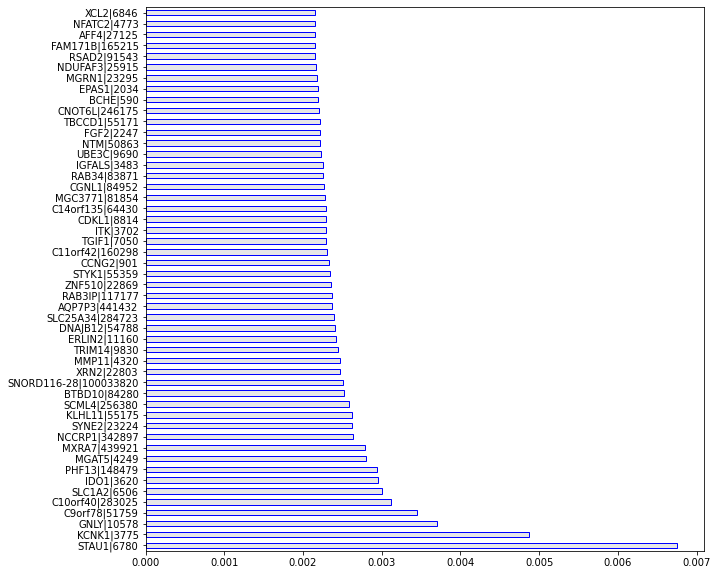

In [9]:
# Plot figure
import matplotlib.pyplot as plt

fig_feat = plt.figure(figsize=(10,10))
feat_importances.nlargest(50).plot(kind='barh', color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.show()